In [1]:
#Installazione dei requisiti
!pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Corrado\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Corrado\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Corrado\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# caricamento dei dataset e manipolazione dati

In [3]:
train_ds=pd.read_csv('train.csv')
test_ds=pd.read_csv('test.csv')

In [4]:
train_ds.head()

,Unnamed: 0,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,3733,No,4709-LKHYG,Female,0,Yes,Yes,29,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,20.00,540.05
1,2105,No,8286-AFUYI,Male,0,No,No,1,Yes,No,...,No,No,No,No,No,Month-to-month,No,Electronic check,47.95,47.95
2,4783,No,1478-VPOAD,Female,0,No,No,1,Yes,No,...,No,No,No,No,No,Month-to-month,No,Electronic check,43.80,43.8
3,4667,No,7566-DSRLQ,Female,0,Yes,No,72,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,110.15,7998.8
4,46,Yes,9940-RHLFB,Female,0,No,No,1,Yes,No,...,No,Yes,No,No,No,Month-to-month,No,Electronic check,75.30,75.3


In [5]:
train_ds.dtypes

Unnamed: 0            int64
Churn                object
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

In [6]:
test_ds.head()
test_ds.dtypes

Unnamed: 0            int64
Churn                object
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

In [7]:
#Creo dai dataset test e train, il dataset contenente tutti i dati per la fase di analisi.
analysis_ds=train_ds.append(test_ds, ignore_index=True)

In [8]:
categoriche_col=[col for col in analysis_ds.columns if analysis_ds[col].dtype=='object']
categoriche_col

['Churn',
 'customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges']

In [9]:
train_ds.isnull().sum()

Unnamed: 0          0
Churn               0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [10]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4225 non-null   int64  
 1   Churn             4225 non-null   object 
 2   customerID        4225 non-null   object 
 3   gender            4225 non-null   object 
 4   SeniorCitizen     4225 non-null   int64  
 5   Partner           4225 non-null   object 
 6   Dependents        4225 non-null   object 
 7   tenure            4225 non-null   int64  
 8   PhoneService      4225 non-null   object 
 9   MultipleLines     4225 non-null   object 
 10  InternetService   4225 non-null   object 
 11  OnlineSecurity    4225 non-null   object 
 12  OnlineBackup      4225 non-null   object 
 13  DeviceProtection  4225 non-null   object 
 14  TechSupport       4225 non-null   object 
 15  StreamingTV       4225 non-null   object 
 16  StreamingMovies   4225 non-null   object 


In [11]:
indexes=[]
for col in categoriche_col:
    count=0
    for value in analysis_ds[col]:
        if not value.strip():
            count+=1
    if count !=0:
        print(col, count,"campi vuoti")

TotalCharges 10 campi vuoti


In [12]:
#Check per vedere se questi campi vuoti corrispondono a dati mancanti o a nuovi clienti.
analysis_ds[['customerID','tenure','MonthlyCharges','TotalCharges']][analysis_ds['tenure']==0]

,customerID,tenure,MonthlyCharges,TotalCharges
80,7644-OMVMY,0,19.85,
1117,4367-NUYAO,0,25.75,
1512,2520-SGTTA,0,20.00,
1576,2775-SEFEE,0,61.90,
2755,3115-CZMZD,0,20.25,
3780,1371-DWPAZ,0,56.05,
4379,2923-ARZLG,0,19.70,
4390,3213-VVOLG,0,25.35,
5039,5709-LVOEQ,0,80.85,
5248,4472-LVYGI,0,52.55,


In [13]:
#Sostituisco i valori di stringa vuota di totalCharges nel train e test set.
train_ds.replace(to_replace=' ',value=0, inplace=True)
test_ds.replace(to_replace=' ',value=0,inplace=True)
analysis_ds.replace(to_replace=' ',value=0, inplace=True)

train_ds[['customerID','tenure','MonthlyCharges','TotalCharges']][train_ds['tenure']==0]
test_ds[['customerID','tenure','MonthlyCharges','TotalCharges']][test_ds['tenure']==0]
analysis_ds[['customerID','tenure','MonthlyCharges','TotalCharges']][analysis_ds['tenure']==0]


#Effettuo il casting di totalCharges da object a float
train_ds['TotalCharges']=pd.to_numeric(train_ds['TotalCharges'],downcast='float')
test_ds['TotalCharges']=pd.to_numeric(test_ds['TotalCharges'],downcast='float')
analysis_ds['TotalCharges']=pd.to_numeric(analysis_ds['TotalCharges'],downcast='float')


In [14]:
#Controllo la cardinalità per verificare in ogni colonna quali siano i valori unici
for col in analysis_ds.columns:
    print(col,analysis_ds[col].unique())

Unnamed: 0 [3733 2105 4783 ...   70 3648 2623]
Churn ['No' 'Yes']
customerID ['4709-LKHYG' '8286-AFUYI' '1478-VPOAD' ... '6685-GBWJZ' '4115-NZRKS'
 '4726-DLWQN']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['Yes' 'No']
tenure [29  1 72 36 32 63 31 60  2  8  4 69 16 71 41 64 66 24 44 10 13 37  5 57
 30 15  3  7 17 23 61 19 38 48 42 28 62 11 27 49 14 39  6 43  9 50  0 40
 12 55 67 22 18 21 51 25 34 65 56 53 58 52 68 59 26 33 47 46 20 70 45 54
 35]
PhoneService ['Yes' 'No']
MultipleLines ['No' 'Yes' 'No phone service']
InternetService ['No' 'DSL' 'Fiber optic']
OnlineSecurity ['No internet service' 'Yes' 'No']
OnlineBackup ['No internet service' 'No' 'Yes']
DeviceProtection ['No internet service' 'No' 'Yes']
TechSupport ['No internet service' 'No' 'Yes']
StreamingTV ['No internet service' 'No' 'Yes']
StreamingMovies ['No internet service' 'No' 'Yes']
Contract ['One year' 'Month-to-month' 'Two year']
PaperlessBilling ['No' 'Yes']
PaymentMethod ['Electronic 

In [15]:
#E'possibile ridurre la cardinalità=3 di alcune colonne, grazie alle informazioni già presenti in 'Phone Service' e 'Internet service'.
#Training set
train_ds['MultipleLines'].replace(to_replace='No phone service',inplace=True,value='No')
train_ds['OnlineBackup'].replace(to_replace='No internet service',inplace=True,value='No')
train_ds['OnlineSecurity'].replace(to_replace='No internet service',inplace=True,value='No')
train_ds['TechSupport'].replace(to_replace='No internet service',inplace=True,value='No')
train_ds['StreamingTV'].replace(to_replace='No internet service',inplace=True,value='No')
train_ds['StreamingMovies'].replace(to_replace='No internet service',inplace=True,value='No')
train_ds['DeviceProtection'].replace(to_replace='No internet service',inplace=True,value='No')
#Test set
test_ds['MultipleLines'].replace(to_replace='No phone service',inplace=True,value='No')
test_ds['OnlineBackup'].replace(to_replace='No internet service',inplace=True,value='No')
test_ds['OnlineSecurity'].replace(to_replace='No internet service',inplace=True,value='No')
test_ds['TechSupport'].replace(to_replace='No internet service',inplace=True,value='No')
test_ds['StreamingTV'].replace(to_replace='No internet service',inplace=True,value='No')
test_ds['StreamingMovies'].replace(to_replace='No internet service',inplace=True,value='No')
test_ds['DeviceProtection'].replace(to_replace='No internet service',inplace=True,value='No')
#Analysis set
analysis_ds['MultipleLines'].replace(to_replace='No phone service',inplace=True,value='No')
analysis_ds['OnlineBackup'].replace(to_replace='No internet service',inplace=True,value='No')
analysis_ds['OnlineSecurity'].replace(to_replace='No internet service',inplace=True,value='No')
analysis_ds['TechSupport'].replace(to_replace='No internet service',inplace=True,value='No')
analysis_ds['StreamingTV'].replace(to_replace='No internet service',inplace=True,value='No')
analysis_ds['StreamingMovies'].replace(to_replace='No internet service',inplace=True,value='No')
analysis_ds['DeviceProtection'].replace(to_replace='No internet service',inplace=True,value='No')

In [16]:
#Verifichiamo che tutto sia andato per il verso giusto 
for col in train_ds.columns:
    print(col,train_ds[col].unique())

for col in test_ds.columns:
    print(col,train_ds[col].unique())

Unnamed: 0 [3733 2105 4783 ... 1015 4897 1044]
Churn ['No' 'Yes']
customerID ['4709-LKHYG' '8286-AFUYI' '1478-VPOAD' ... '6993-YGFJV' '7078-NVFAM'
 '9090-SGQXL']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['Yes' 'No']
tenure [29  1 72 36 32 63 31 60  2  8  4 69 16 71 41 64 66 24 44 10 13 37  5 57
 30 15  3  7 17 23 61 19 38 48 42 28 62 11 27 49 14 39  6 43  9 50  0 40
 12 55 67 22 18 21 51 25 34 65 56 53 58 52 68 59 26 33 47 46 20 70 45 54
 35]
PhoneService ['Yes' 'No']
MultipleLines ['No' 'Yes']
InternetService ['No' 'DSL' 'Fiber optic']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['No' 'Yes']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['One year' 'Month-to-month' 'Two year']
PaperlessBilling ['No' 'Yes']
PaymentMethod ['Electronic check' 'Mailed check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
MonthlyCharges [ 20.    47.95  43.8  ...  35.65  46.4  112.55]
TotalCharg

# Analisi dei dati 
Analisi delle feature numeriche

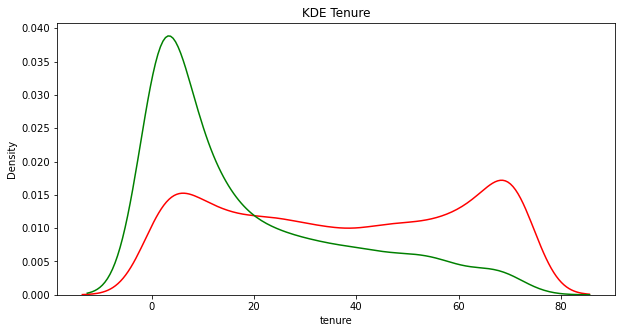

In [17]:
plt.figure(figsize=(10,5))
plt.title('KDE Tenure')
axis0=sns.kdeplot(analysis_ds[analysis_ds['Churn']=='No']['tenure'],color='red')
axis1=sns.kdeplot(analysis_ds[analysis_ds['Churn']=='Yes']['tenure'], color='green')

Come si evince dal grafico, un nuovo cliente(con tenure <20) ha una probabiltà di abbandonare la compagnia molto più alta(Churn=yes).Questa feature risulta importantissima per l'analisi

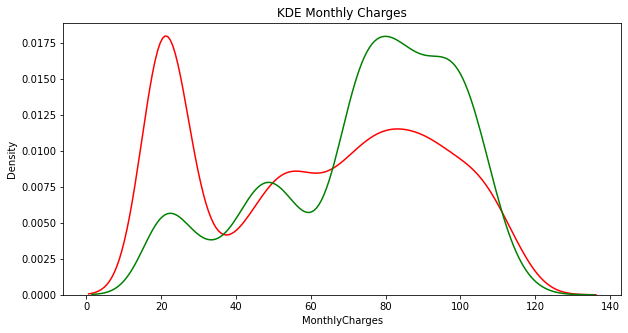

In [18]:
plt.figure(figsize=(10,5))
plt.title('KDE Monthly Charges')
axis0=sns.kdeplot(analysis_ds[analysis_ds['Churn']=='No']['MonthlyCharges'],color='red')
axis1=sns.kdeplot(analysis_ds[analysis_ds['Churn']=='Yes']['MonthlyCharges'], color='green')

Analizzando il grafico di MonthlyCharges, possiamo notare che più è alto il pagamento mensile maggiore sarà la possibilità che il cliente decida di abbandonare(Churn=yes)

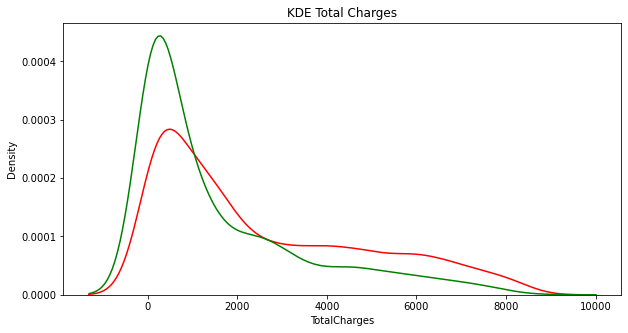

In [19]:
plt.figure(figsize=(10,5))
plt.title('KDE Total Charges')
axis0=sns.kdeplot(analysis_ds[analysis_ds['Churn']=='No']['TotalCharges'],color='red')
axis1=sns.kdeplot(analysis_ds[analysis_ds['Churn']=='Yes']['TotalCharges'], color='green')

Dal grafico,vediamo come Total charges<2000 è sicuramente un buon indicatore della possibilità che un cliente abbandoni la compagnia. Infatti la probabilità di churn=yes è molto alta finche le spese totali contrattuali del cliente sono inferiori a 2000
Concludendo, le tre feature 'total charges,monthly charges, tenure' sono delle feature molto rilevanti per la nostra analisi, come già poteva intuirsi dal significato sintattico di questi campi. 

Analisi feature categoriche

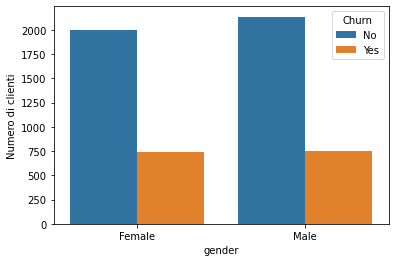

In [20]:
#Gender
data=analysis_ds.groupby('gender')['Churn'].value_counts().to_frame()
data=data.rename({'Churn':'Numero di clienti'} ,axis=1).reset_index()
ax=sns.barplot(x='gender',y='Numero di clienti', orient='v',hue='Churn',data=data)

Questa feature non risulta molto importante per la nostra analisi. Infatti non sembra esserci molta distinzione sul comportamento del cliente in base al sesso rispetto alla possibilità di abbandonare la compagnia (Churn yes).
Verifichiamo che nelle categorie numeriche il sesso non influisca sulla possibilità di Churn

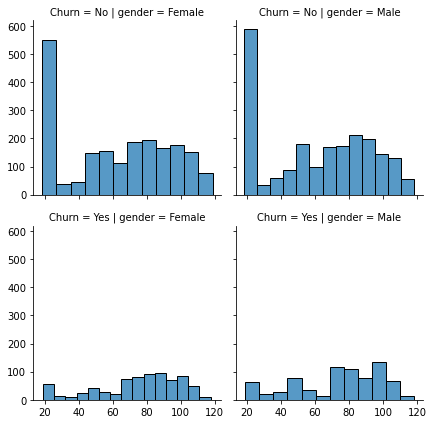

In [21]:
g=sns.FacetGrid(analysis_ds,col='gender',row='Churn')
g.map_dataframe(sns.histplot,x='MonthlyCharges')
g.add_legend();

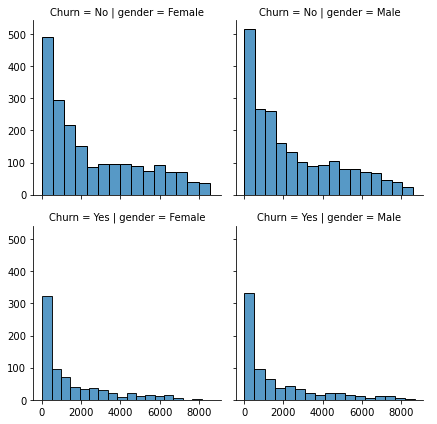

In [22]:
g=sns.FacetGrid(analysis_ds,col='gender',row='Churn')
g.map_dataframe(sns.histplot,x='TotalCharges')
g.add_legend();

Anche sulle feature numeriche sembra che il sesso non influisca sulla possibilità di Churn. Quindi tranuqillamente possiamo scartare la colonna gender perché non sarà significativa nella nostra classificazione

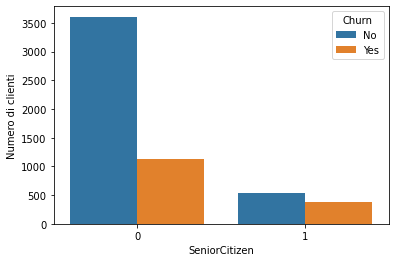

In [23]:
#SeniorCitizen
data=analysis_ds.groupby('SeniorCitizen')['Churn'].value_counts().to_frame()
data=data.rename({'Churn':'Numero di clienti'} ,axis=1).reset_index()
ax=sns.barplot(x='SeniorCitizen',y='Numero di clienti', orient='v',hue='Churn',data=data)

Nonostante i senior citizen risultino pochi rispetto alla popolazione del dataset, è evidente che la possibilità di Churn per le persone provenienti da questo insieme sia molto elevata.
Questa è una feature che dovremo tenere in considerazione nella classificazione.

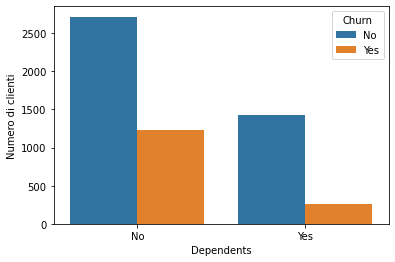

In [24]:
#Dependents
data=analysis_ds.groupby('Dependents')['Churn'].value_counts().to_frame()
data=data.rename({'Churn':'Numero di clienti'} ,axis=1).reset_index()
ax=sns.barplot(x='Dependents',y='Numero di clienti', orient='v',hue='Churn',data=data)

Anche in questo caso, nonostante la popolazione del dataset risulti povera, è una feature da tenere in considerazione poiché per Dependents=no risulta una più alta possibilità di Churn=yes.

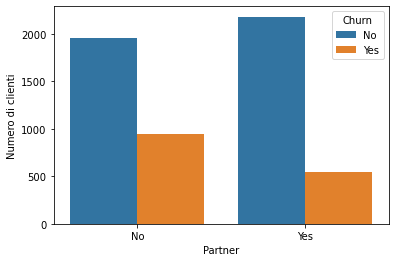

In [25]:
#Partners
data=analysis_ds.groupby('Partner')['Churn'].value_counts().to_frame()
data=data.rename({'Churn':'Numero di clienti'} ,axis=1).reset_index()
ax=sns.barplot(x='Partner',y='Numero di clienti', orient='v',hue='Churn',data=data)

Anche Partner risulta essere una feature interessante per l'analisi poiché quasi la metà dei clienti che non hanno un partner sembra essere maggiormente propensa ad abbandonare la compagnia Churn=yes)
Sicuramente in maggior proporzione rispetto alla situazione in cui il cliente non abbia il partner.

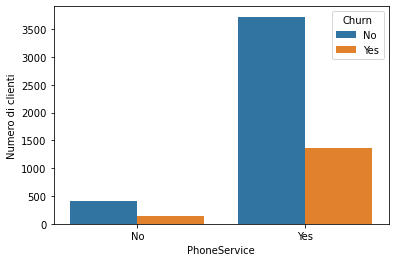

In [26]:
#Phone Service
data=analysis_ds.groupby('PhoneService')['Churn'].value_counts().to_frame()
data=data.rename({'Churn':'Numero di clienti'} ,axis=1).reset_index()
ax=sns.barplot(x='PhoneService',y='Numero di clienti', orient='v',hue='Churn',data=data)

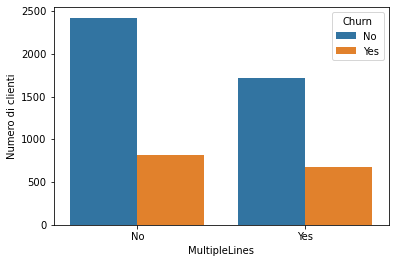

In [27]:
data=analysis_ds.groupby('MultipleLines')['Churn'].value_counts().to_frame()
data=data.rename({'Churn':'Numero di clienti'} ,axis=1).reset_index()
ax=sns.barplot(x='MultipleLines',y='Numero di clienti', orient='v',hue='Churn',data=data)

Per i clienti che hanno una (o più linee telefoniche) risulta una possibilità maggiore di Churn. In particolare, guardando i clienti che hanno molteplici linee, questi hanno una maggiore possibilità di abbandonare la compagnia rispetto ai clienti che hanno una sola linea fissa.
Quindi, anche queste due feature risultano probabilmente significative per l'analisi.

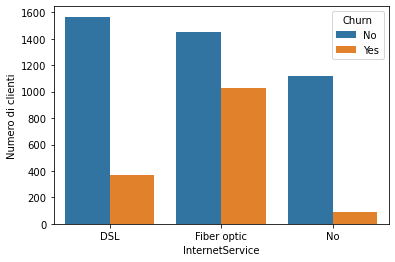

In [28]:
#Internet e servizi addizionali
data=analysis_ds.groupby('InternetService')['Churn'].value_counts().to_frame()
data=data.rename({'Churn':'Numero di clienti'} ,axis=1).reset_index()
ax=sns.barplot(x='InternetService',y='Numero di clienti', orient='v',hue='Churn',data=data)

Come si evince dal grafico, chi ha un collegamento in fibra ottica ha una possibilità maggiore di Churn rispetto a chi utilizza la linea DSL oppure non ha il collegamento internet
Questa feature sicuramente sarà significativa.

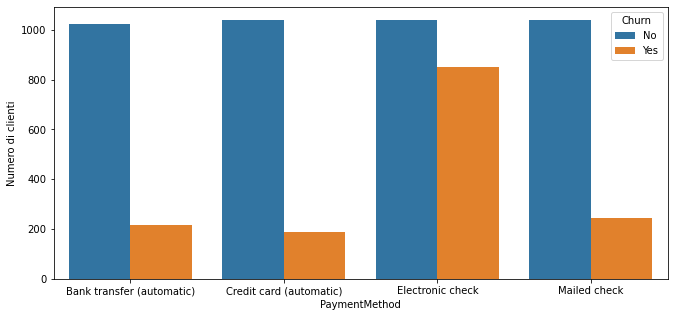

In [29]:
#Payments
data=analysis_ds.groupby('PaymentMethod')['Churn'].value_counts().to_frame()
data=data.rename({'Churn':'Numero di clienti'} ,axis=1).reset_index()
plt.figure(figsize=(11,5))
ax=sns.barplot(x='PaymentMethod',y='Numero di clienti', orient='v',hue='Churn',data=data)

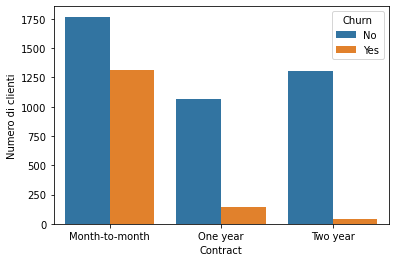

In [30]:
#Contract
data=analysis_ds.groupby('Contract')['Churn'].value_counts().to_frame()
data=data.rename({'Churn':'Numero di clienti'} ,axis=1).reset_index()
ax=sns.barplot(x='Contract',y='Numero di clienti', orient='v',hue='Churn',data=data)

Entrambe le feature 'Contract' e 'Payment method' risultano essere molto rilevanti per la fase d'analisi. Questo perché nel caso di PaymentMethod, la scelta Electronic check risulta essere molto proporzionaslmente sbilanciata rispetto agli altri campi della stessa colonna verso la possibilità di Churn.
Analogamente in contract, l'opzione month to month sembra essere molto indicativa rispetto alla possibilità di Churn di un cliente.

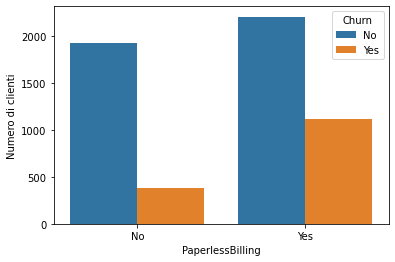

In [31]:
#Paperless Billing
data=analysis_ds.groupby('PaperlessBilling')['Churn'].value_counts().to_frame()
data=data.rename({'Churn':'Numero di clienti'} ,axis=1).reset_index()
ax=sns.barplot(x='PaperlessBilling',y='Numero di clienti', orient='v',hue='Churn',data=data)

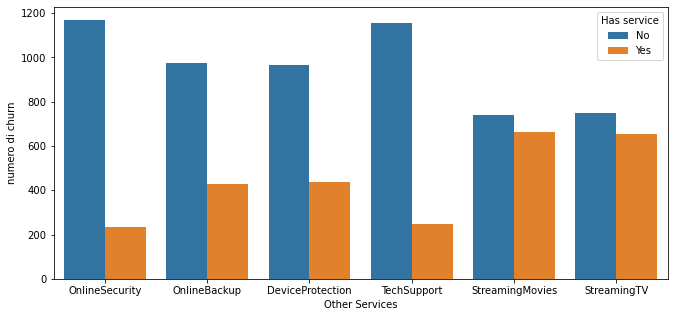

In [32]:
#Other Services
other_cols=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','StreamingTV']
plt.figure(figsize=(11,5))
data_other=analysis_ds[(analysis_ds.InternetService != "No") & (analysis_ds.Churn== "Yes")]
data_other=pd.melt(data_other[other_cols]).rename({'value':'Has service'}, axis=1)
ax=sns.countplot(data=data_other, x='variable',hue='Has service',hue_order=['No','Yes'])
ax.set(xlabel='Other Services',ylabel='numero di churn')
plt.show()

Tra tutti i servizi internet offerti dalla compagnia, in base al numero di churn riscontrati, solo i servizi di Streaming sembrano non avere rilevanza nell'analisi
quindi possiamo tranquillamente scartare queste due feature dai datset

#Preparazione dei dataset e preprocessing

In [33]:
from sklearn.preprocessing import LabelEncoder
#Label encoding
label_train=train_ds.copy()
label_encoder=LabelEncoder()
for col in categoriche_col:
    label_train[col]=label_encoder.fit_transform(label_train[col])

label_test=test_ds.copy()
for col in categoriche_col:
    label_test[col]=label_encoder.fit_transform(label_test[col])

In [34]:
Y_train=label_train['Churn']
Y_test=label_test['Churn']
X_train=label_train.drop(['Churn','customerID','gender','StreamingTV','StreamingMovies'],axis=1)
X_test=label_test.drop(['Churn','customerID','gender','StreamingTV','StreamingMovies'],axis=1)


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.ensemble import AdaBoostClassifier

In [36]:
#Logistic Regression
log_regr=LogisticRegression(max_iter=6000,solver='lbfgs')
log_regr.fit(X_train,Y_train)
predictions_log_regr=log_regr.predict(X_test)
test_acc_logr= [log_regr.score(X_test, Y_test)]
print("Test accuracy logistic regression:",test_acc_logr)
print("Logistic Regression MAE:",metrics.mean_absolute_error(Y_test,predictions_log_regr))


Test accuracy logistic regression: [0.7125621007806955]
Logistic Regression MAE: 0.28743789921930446


In [37]:
#Random Forest
rnd_forest=RandomForestClassifier(random_state=13)
rnd_forest.fit(X_train,Y_train)
predictions_rnd_forest=rnd_forest.predict(X_test)
test_acc_rndf= [rnd_forest.score(X_test, Y_test)]
print("Test accuracy random forest:",test_acc_rndf)
print("Random forest MAE:",metrics.mean_absolute_error(Y_test,predictions_rnd_forest))

Test accuracy random forest: [0.7934705464868701]
Random forest MAE: 0.20652945351312987


In [38]:
#KneighborsClassifier
knc=KNeighborsClassifier(n_neighbors=42)
knc.fit(X_train,Y_train)
predictions_knc=knc.predict(X_test)
test_knc= [knc.score(X_test, Y_test)]
print("Test accuracy KNeighbors:",test_knc)
print("KNeighbors MAE:",metrics.mean_absolute_error(Y_test,predictions_knc))

Test accuracy KNeighbors: [0.6799148332150461]
KNeighbors MAE: 0.32008516678495386


In [39]:
#Decision Tree Classifier
dt=DecisionTreeClassifier(random_state=42, criterion="entropy")
dt.fit(X_train,Y_train)
predictions_dt=dt.predict(X_test)
test_dt= [dt.score(X_test, Y_test)]
print("Test Accuracy Decision Tree",test_dt)
print("Decision Tree MAE:",metrics.mean_absolute_error(Y_test,predictions_dt))

Test Accuracy Decision Tree [0.7437899219304471]
Decision Tree MAE: 0.25621007806955287


In [40]:
ada=AdaBoostClassifier(n_estimators=50, random_state=0)
ada.fit(X_train,Y_train)
predictions_ada=ada.predict(X_test)
test_ada=[ada.score(X_test,Y_test)]
print("Test accuracy Adaboost:",test_ada)
print("Adaboost MAE",metrics.mean_absolute_error(Y_test,predictions_ada))

Test accuracy Adaboost: [0.7863733144073811]
Adaboost MAE 0.21362668559261888


CALCOLO CURVE DI ROC PER CONFRONTARE I METODI DI CLASSIFICAZIONE, viste sia nel corso di IA che di ML

In [41]:
#Logistic
fp_lr,tp_lr,thres_lr=metrics.roc_curve(Y_test,predictions_log_regr)
auc_lr_score=metrics.roc_auc_score(Y_test,predictions_log_regr)
#RandomForest
fp_rf,tp_rf,thres_rf=metrics.roc_curve(Y_test,predictions_rnd_forest)
auc_rf_score=metrics.roc_auc_score(Y_test,predictions_rnd_forest)
#KNN
fp_kn,tp_kn,thres_kn=metrics.roc_curve(Y_test,predictions_knc)
auc_kn_score=metrics.roc_auc_score(Y_test,predictions_knc)
#DecisionTree
fp_dt,tp_dt,thres_dt=metrics.roc_curve(Y_test,predictions_dt)
auc_dt_score=metrics.roc_auc_score(Y_test,predictions_dt)
#Adaboost
fp_ada,tp_ada,thres_ada=metrics.roc_curve(Y_test,predictions_ada)
auc_ada_score=metrics.roc_auc_score(Y_test,predictions_ada)

In [42]:
random_probs=[0 for i in range(len(Y_test))]
random_fp,random_tp,_=metrics.roc_curve(Y_test,random_probs,pos_label=1)

In [43]:
print("DecisionTreeClassifier:",auc_dt_score)
print("RandomForestClassifier:",auc_rf_score)
print("KNeighborsClassifier:",auc_kn_score)
print("LogisticRegression:",auc_lr_score)
print("AdaBoostClassifier:",auc_ada_score)

DecisionTreeClassifier: 0.667094928973573
RandomForestClassifier: 0.7062245797519585
KNeighborsClassifier: 0.5346479233034802
LogisticRegression: 0.7374977459878583
AdaBoostClassifier: 0.7176862314920558


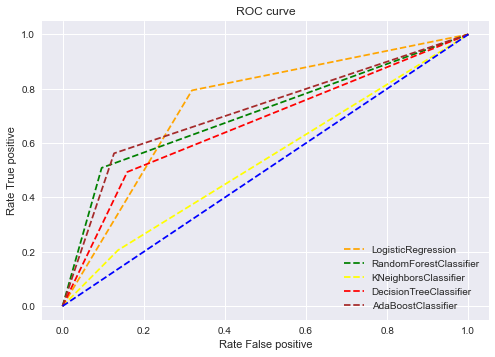

In [44]:
plt.style.use('seaborn')
plt.plot(fp_lr,tp_lr,linestyle='--',color='orange', label='LogisticRegression')
plt.plot(fp_rf,tp_rf,linestyle='--',color='green', label='RandomForestClassifier')
plt.plot(fp_kn,tp_kn,linestyle='--',color='yellow', label='KNeighborsClassifier')
plt.plot(fp_dt,tp_dt,linestyle='--',color='red', label='DecisionTreeClassifier')
plt.plot(fp_ada,tp_ada,linestyle='--',color='brown', label='AdaBoostClassifier')
plt.plot(random_fp,random_tp,linestyle='--',color='blue')

plt.title('ROC curve')
plt.xlabel('Rate False positive')
plt.ylabel('Rate True positive')
plt.legend(loc='best')
plt.show();